In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path

In [66]:
MMS_PER_PIXEL = 0.008479
F50_DISTRIB = {
    20  :  0.0,
    30  :  0.3,
    40  : 10.5,
    50  : 34.0,
    70  : 37.0,
    100 : 15.0,
    140 :  3.0,
    200 :  0.2,
    270 :  0.0,
}

USA_TO_MM = {
    20  : 0.850,
    30  : 0.600,
    40  : 0.425,
    50  : 0.300,
    70  : 0.212,
    100 : 0.150,
    140 : 0.106,
    200 : 0.075,
    270 : 0.053,
}

print(USA_TO_MM[140])

0.106


In [4]:
csv_path = Path(r'data\F50_KelF_P1-raw_meshes-output\F50_KelF_P1_properties.csv')
df = pd.read_csv(csv_path)
df.head()

,particleID,meshed,n_voxels,centroid,min_slice,max_slice,min_row,max_row,min_col,max_col
0,119,False,5,"76, 175, 4",3,5,175,177,75,77
1,144,True,420,"94, 171, 8",6,13,166,178,88,99
2,166,True,3279,"334, 236, 11",2,22,226,247,324,346
3,169,True,3155,"89, 428, 11",3,21,416,438,76,101
4,175,True,3286,"564, 320, 13",3,22,308,334,553,583


In [7]:
n_voxels = df['n_voxels'].to_numpy()
n_voxels[:5]

array([   5,  420, 3279, 3155, 3286], dtype=int64)

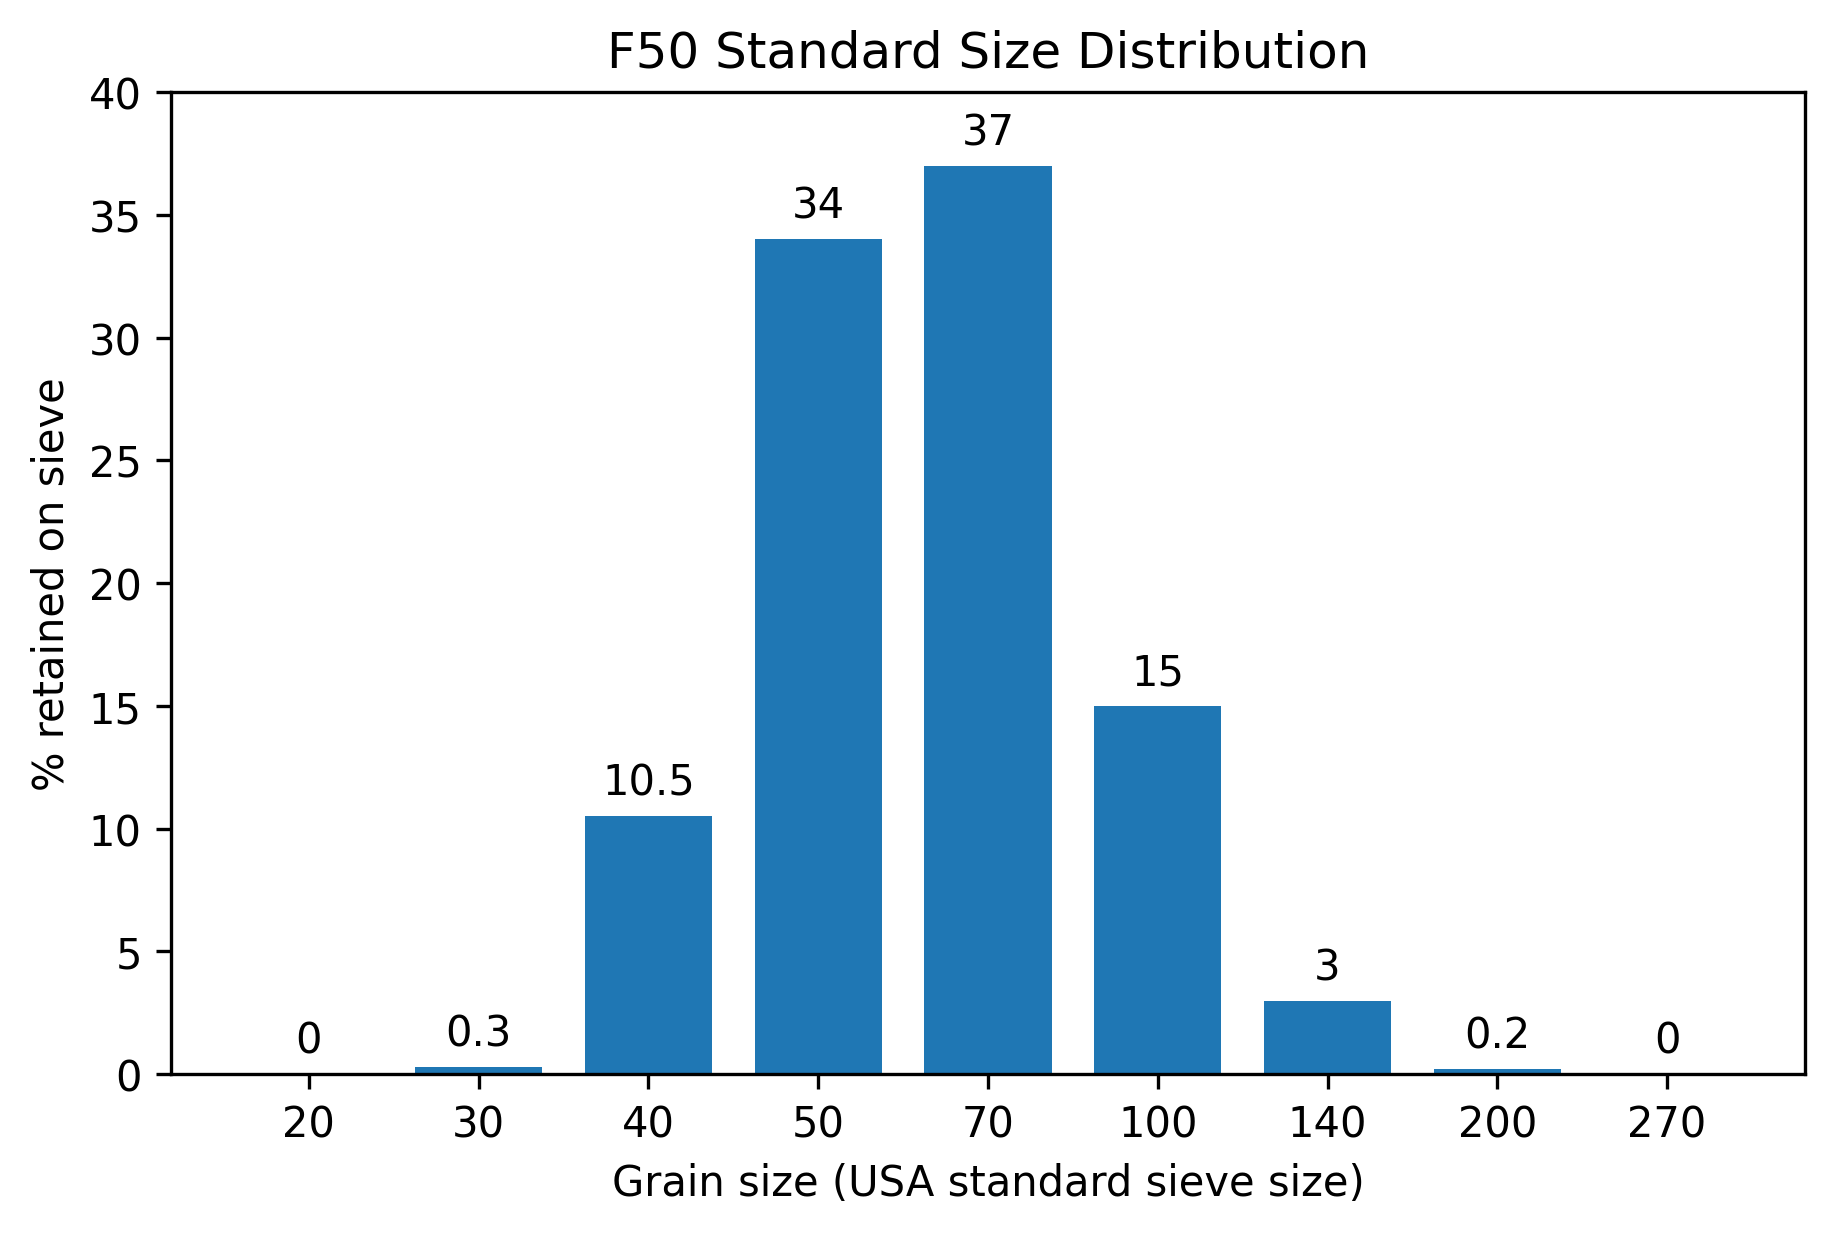

In [43]:
labels = list(F50_DISTRIB.keys())
bar_vals = list(F50_DISTRIB.values())
x_pos = np.arange(len(labels))  # the label locations
width = 0.75  # the width of the bars

fig, ax = plt.subplots(constrained_layout=True, dpi=300)
rects1 = ax.bar(
        x_pos, bar_vals, width, label='STD')
        # x_pos - width/2, list(F50_DISTRIB.values()), width, label='STD')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('F50 Standard Size Distribution')
ax.set_ylabel('% retained on sieve')
ax.set_ylim([0, 40])
ax.set_xticks(x_pos, labels)
ax.set_xlabel('Grain size (USA standard sieve size)')
# ax.legend()
ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)
plt.show()

In [65]:
std_vols_mm = np.zeros((len(F50_DISTRIB)))
for i, d_usa in enumerate(F50_DISTRIB.keys()):
    d_mm = USA_TO_MM[d_usa]
    std_vols_mm[i] = 4 / 3 * np.pi * (d_mm / 2)**3
print(std_vols_mm)

[3.21555098e-01 1.13097336e-01 4.01943873e-02 1.41371669e-02
 4.98891615e-03 1.76714587e-03 6.23614519e-04 2.20893233e-04
 7.79518149e-05]


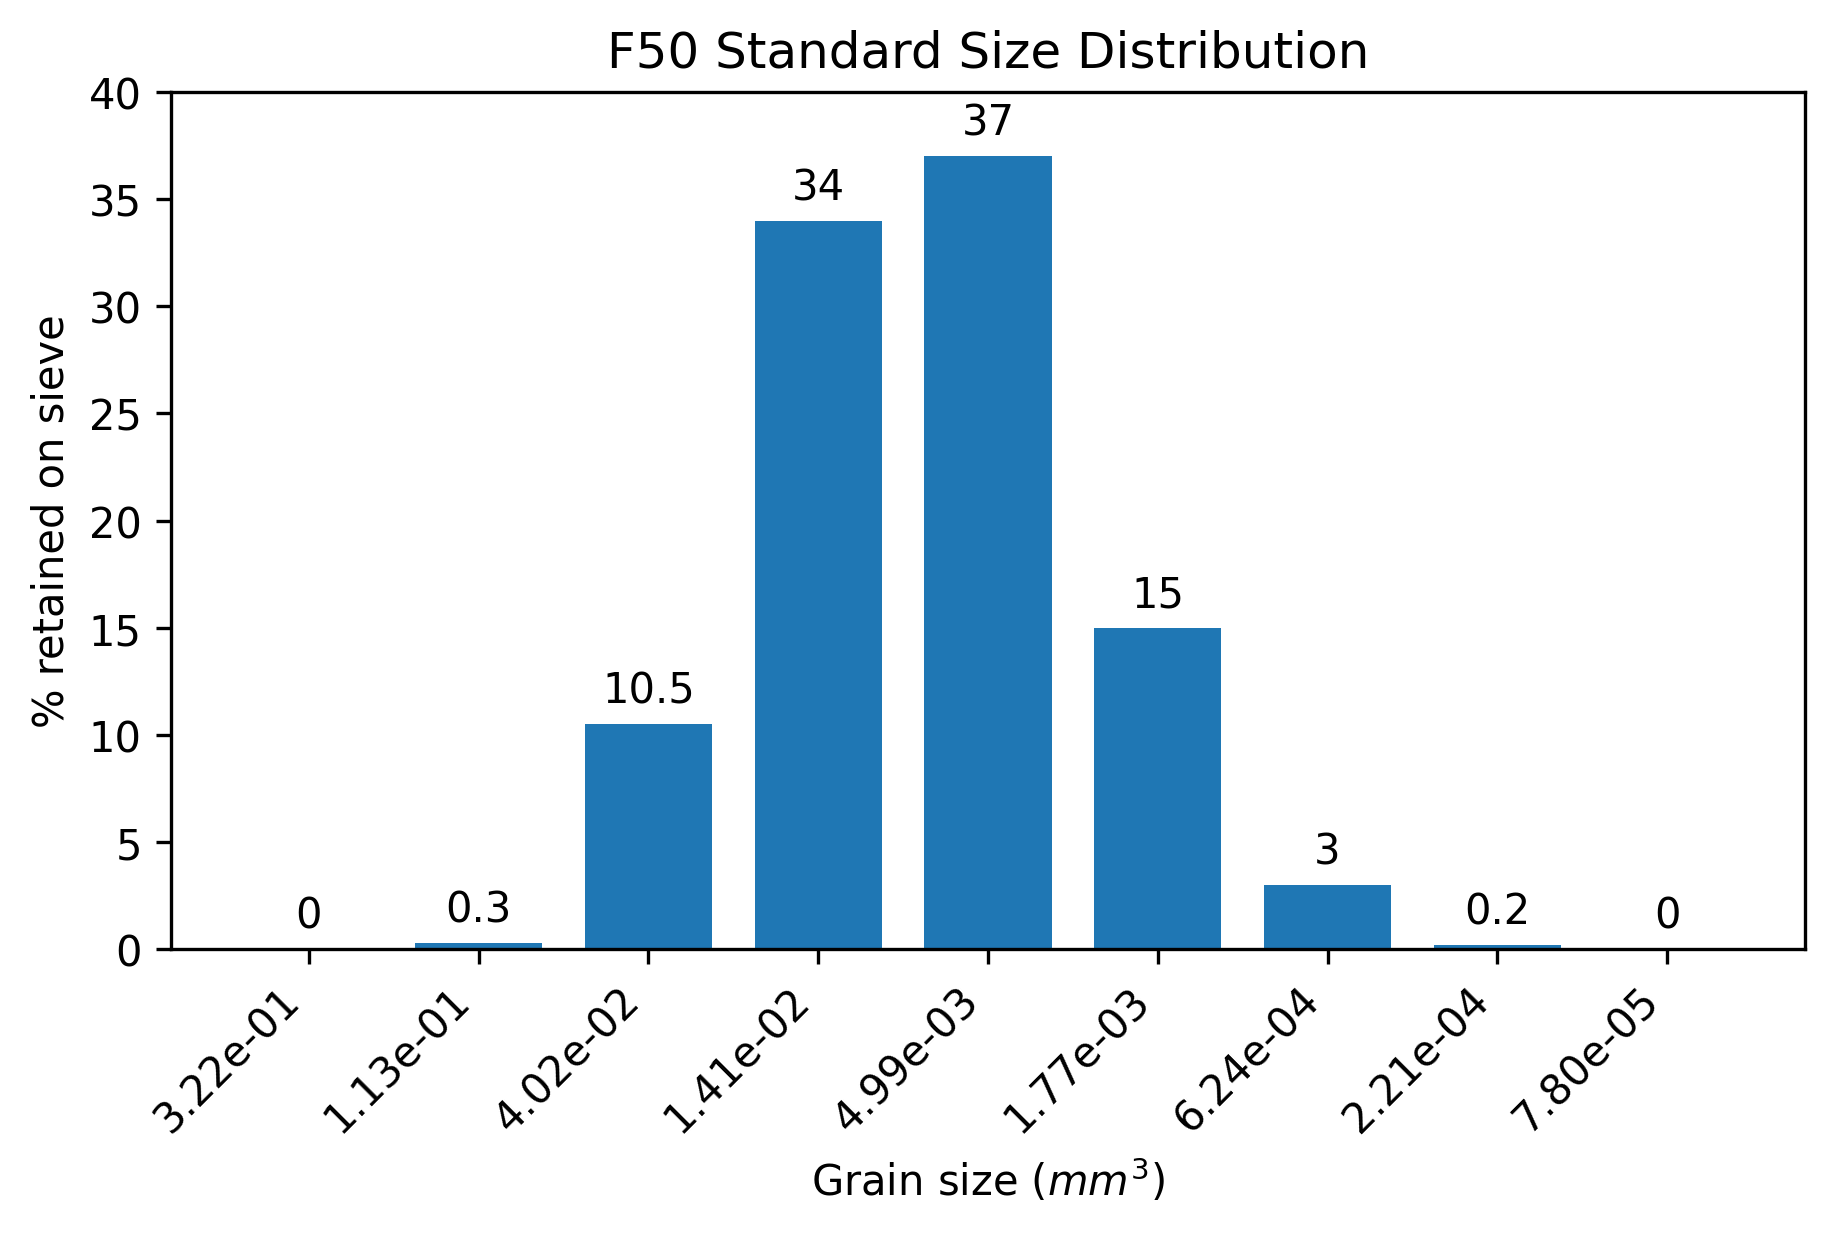

In [78]:
labels = [f'{vol:.2e}' for vol in std_vols_mm]
bar_vals = list(F50_DISTRIB.values())
x_pos = np.arange(len(labels))  # the label locations
width = 0.75  # the width of the bars

fig, ax = plt.subplots(constrained_layout=True, dpi=300)
rects1 = ax.bar(
        x_pos, bar_vals, width, label='STD')
        # x_pos - width/2, list(F50_DISTRIB.values()), width, label='STD')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('F50 Standard Size Distribution')
ax.set_ylabel('% retained on sieve')
ax.set_ylim([0, 40])
ax.set_xticks(x_pos, labels, rotation=45, ha='right')
ax.set_xlabel('Grain size ($mm^3$)')
# ax.legend()
ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)
plt.show()

In [68]:
exp_vols_mm = n_voxels * MMS_PER_PIXEL**3

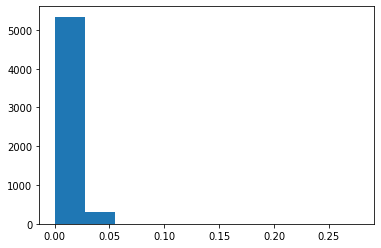

In [80]:
fig, ax = plt.subplots()
ax.hist(exp_vols_mm)
plt.show()

In [96]:
test = np.array([1, 2, 3])
test2 = np.insert(test, 0, 0)
print(test2)

[0 1 2 3]


In [116]:
bins = np.insert(std_vols_mm[::-1], 0, 0)
print(bins)
exp_vol_counts_reversed, bin_edges = np.histogram(exp_vols_mm, bins)
exp_vol_counts = exp_vol_counts_reversed[::-1]
print(f'{exp_vol_counts=}')
exp_vol_percent = exp_vol_counts / len(exp_vols_mm) * 100
print(f'{exp_vol_percent=}')

[0.00000000e+00 7.79518149e-05 2.20893233e-04 6.23614519e-04
 1.76714587e-03 4.98891615e-03 1.41371669e-02 4.01943873e-02
 1.13097336e-01 3.21555098e-01]
exp_vol_counts=array([   1,   48, 1363, 2298, 1529,  290,   26,   20,   74], dtype=int64)
exp_vol_percent=array([1.77022482e-02, 8.49707913e-01, 2.41281643e+01, 4.06797663e+01,
       2.70667375e+01, 5.13365197e+00, 4.60258453e-01, 3.54044964e-01,
       1.30996637e+00])


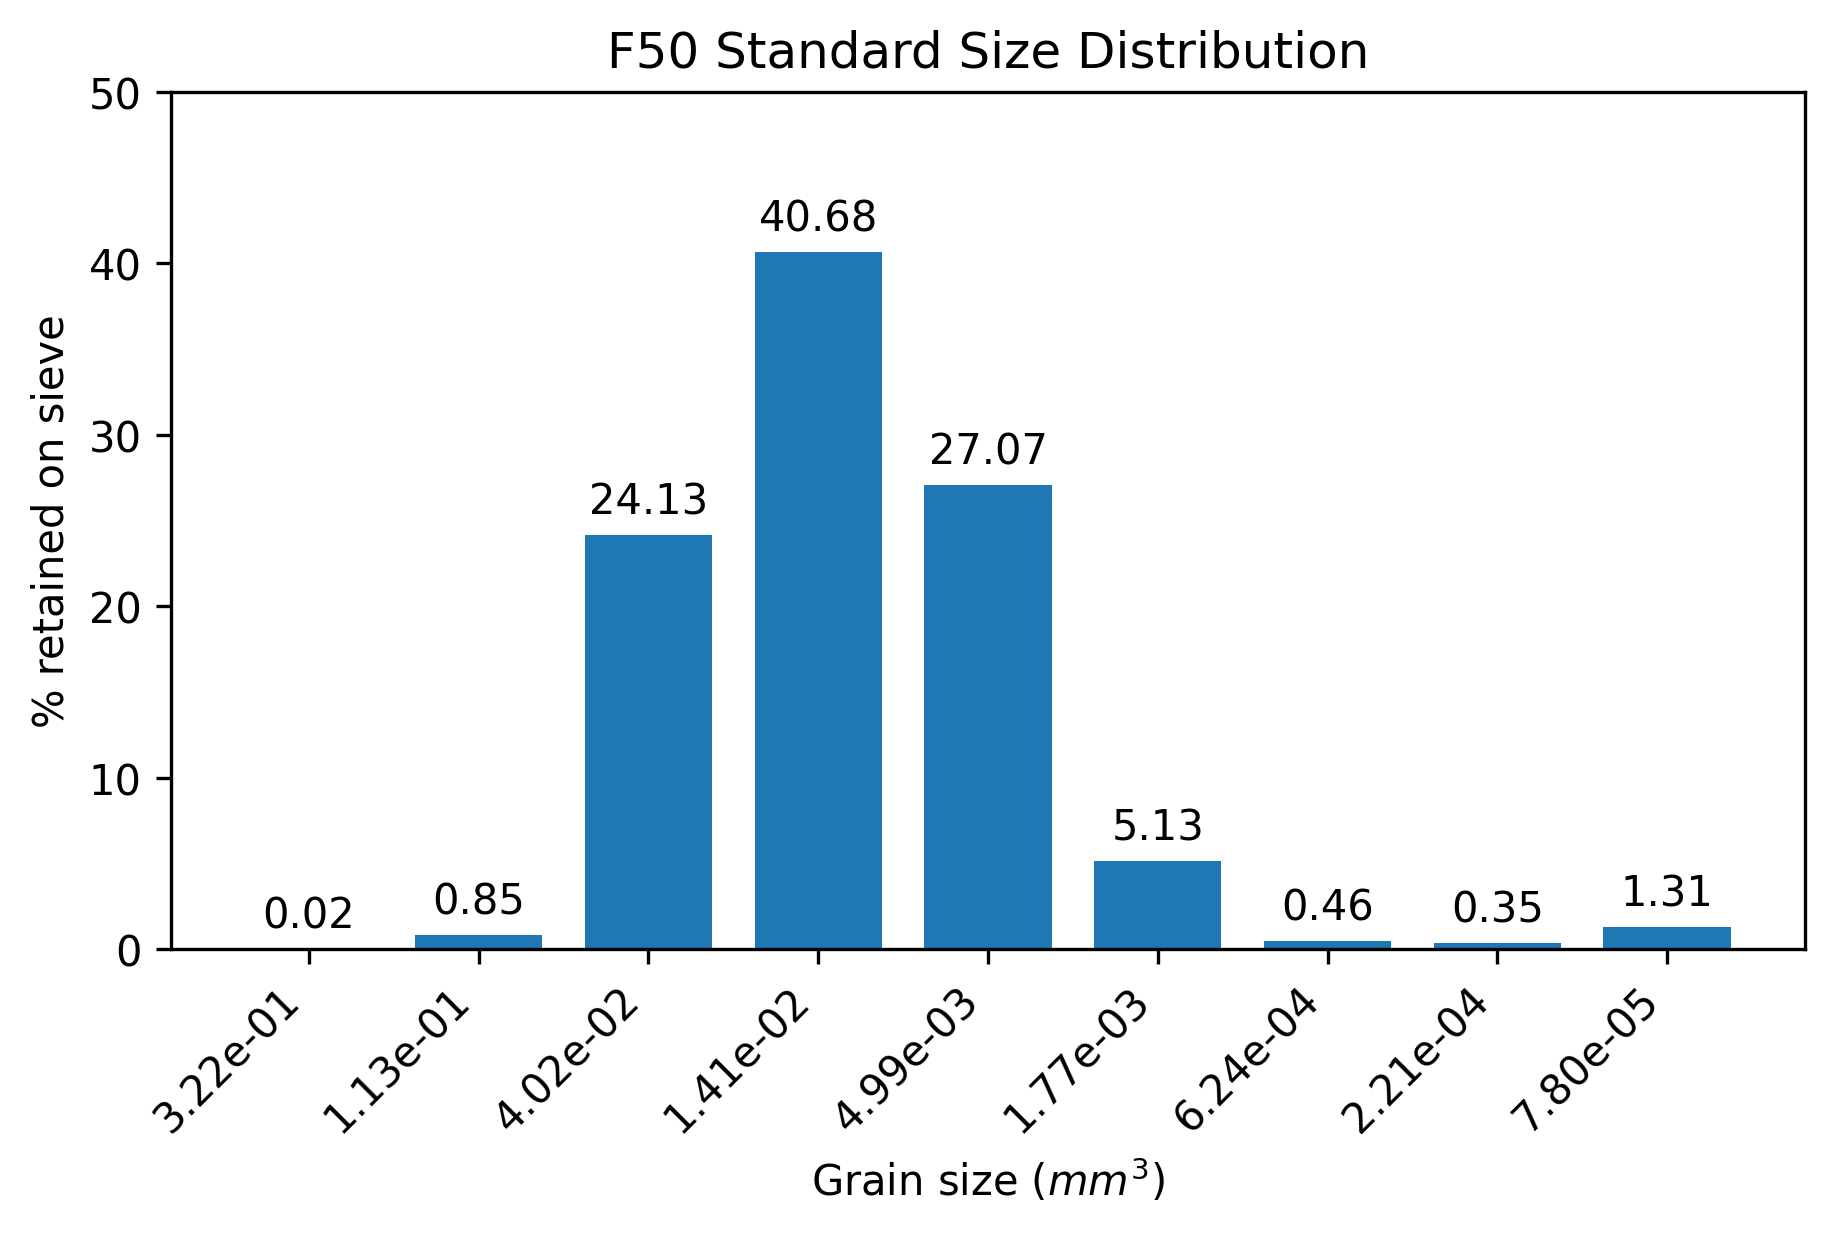

In [104]:
labels = [f'{vol:.2e}' for vol in std_vols_mm]
bar_vals = [round(vol, 2) for vol in exp_vol_percent]
x_pos = np.arange(len(labels))  # the label locations
width = 0.75  # the width of the bars

fig, ax = plt.subplots(constrained_layout=True, dpi=300)
rects1 = ax.bar(
        x_pos, bar_vals, width, label='STD')
        # x_pos - width/2, list(F50_DISTRIB.values()), width, label='STD')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('F50 Standard Size Distribution')
ax.set_ylabel('% retained on sieve')
ax.set_ylim([0, 50])
ax.set_xticks(x_pos, labels, rotation=45, ha='right')
ax.set_xlabel('Grain size ($mm^3$)')
# ax.legend()
ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)
plt.show()

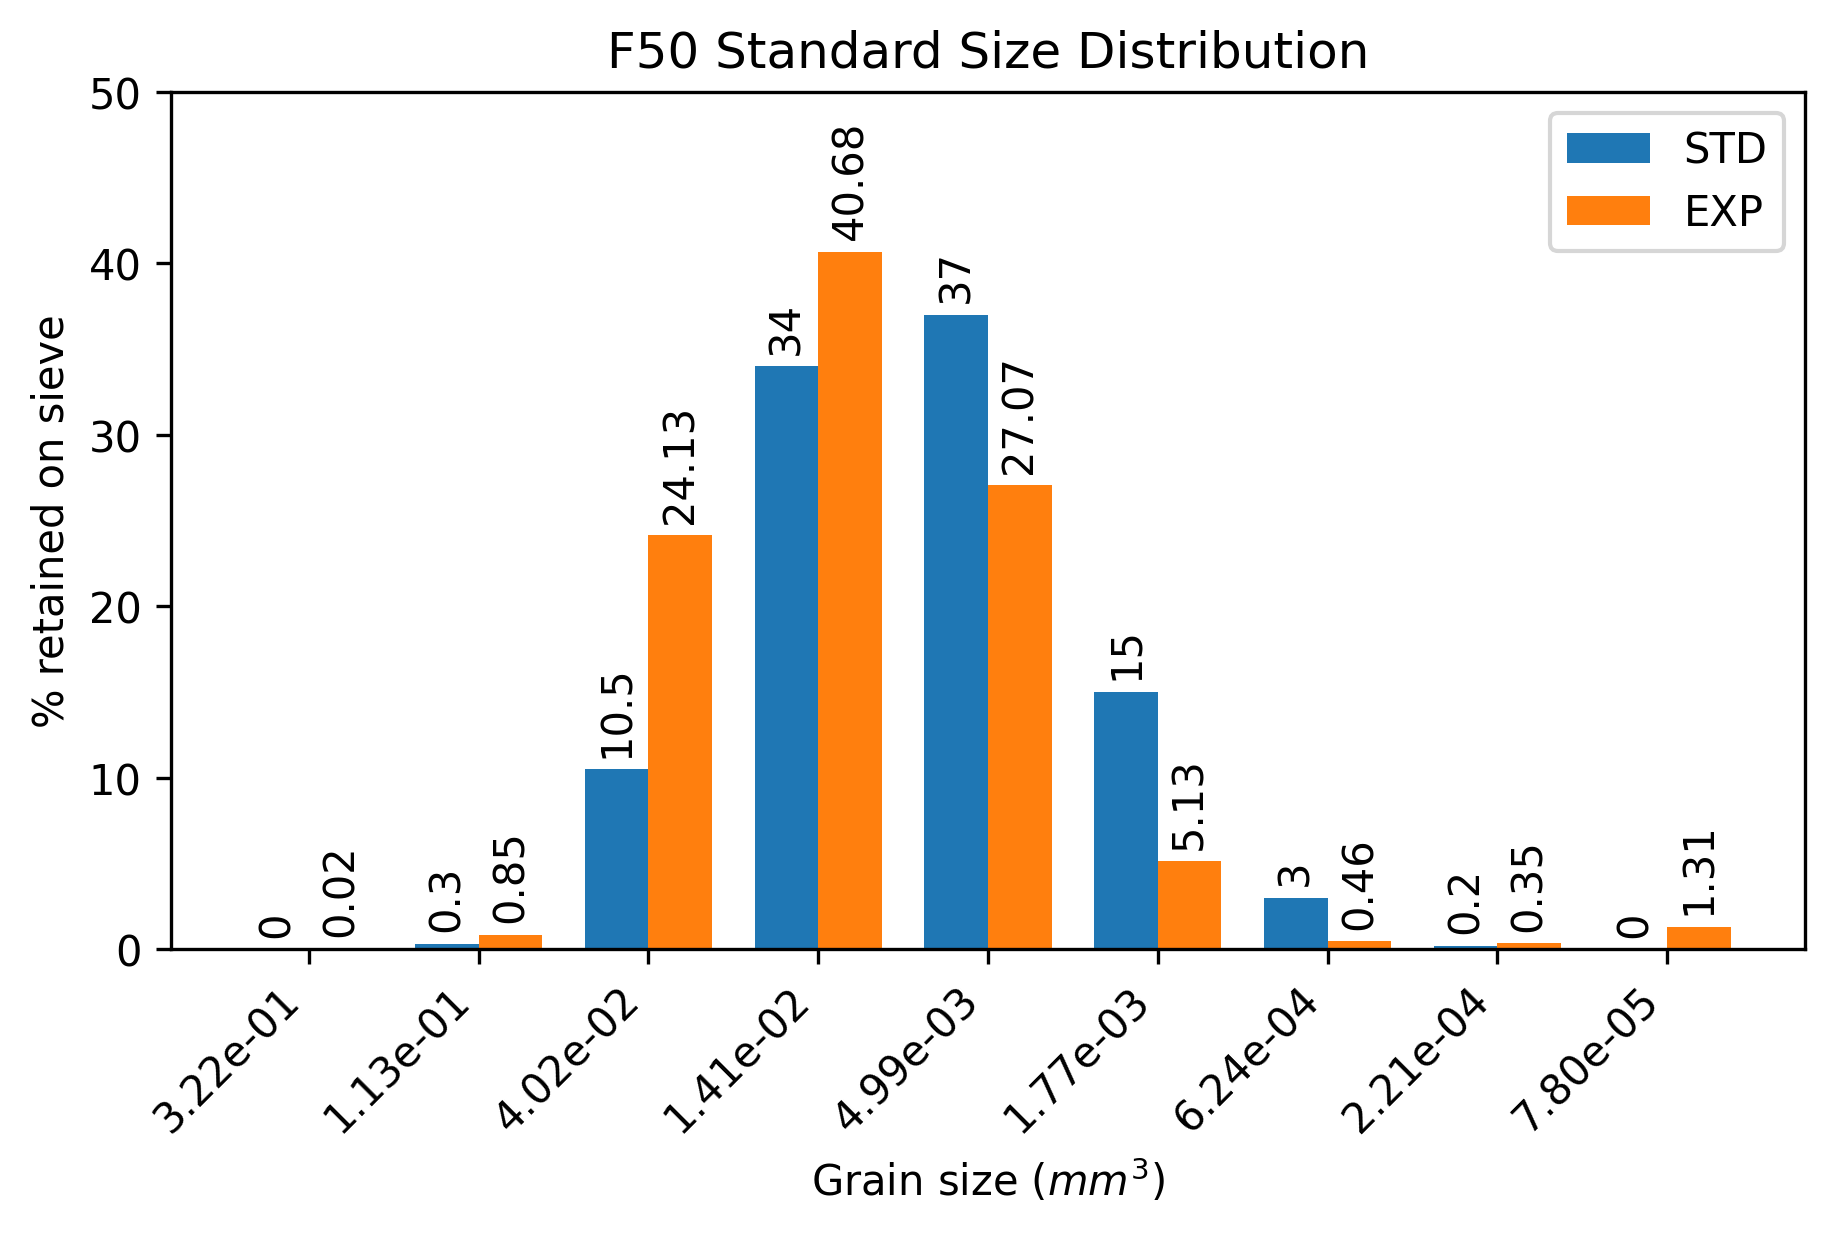

In [115]:
labels = [f'{vol:.2e}' for vol in std_vols_mm]
std_vals = list(F50_DISTRIB.values())
exp_vals = [round(vol, 2) for vol in exp_vol_percent]
x_pos = np.arange(len(labels))  # the label locations
width = 0.75 / 2  # the width of the bars

fig, ax = plt.subplots(constrained_layout=True, dpi=300)
rects_std = ax.bar(
        x_pos - width / 2, std_vals, width, label='STD')
rects_exp = ax.bar(
        x_pos + width / 2, exp_vals, width, label='EXP')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('F50 Standard Size Distribution')
ax.set_ylabel('% retained on sieve')
ax.set_ylim([0, 50])
ax.set_xticks(x_pos, labels, rotation=45, ha='right')
ax.set_xlabel('Grain size ($mm^3$)')
ax.legend()
ax.bar_label(rects_std, padding=3, rotation=90)
ax.bar_label(rects_exp, padding=3, rotation=90)
plt.show()